#It is data transformation that  finds out the feature which has the most variance in the data

In [65]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer ()

In [5]:
cancer.keys( )

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#print(cancer['DESCR'])

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [11]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [12]:
#It is difficult to visualize large dimensional data with our usual method. We can use PCA 7
#to determine which features affect our distribution between malignant and benign tumour the most (Principal Components)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler( )

In [15]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data = scaler.transform(df)

In [19]:
#PCA

In [21]:
from sklearn.decomposition import PCA

In [46]:
pca_instance = PCA ( n_components=3)

In [47]:
pca_instance.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
x_pca = pca_instance.transform(scaled_data)

In [49]:
scaled_data.shape

(569, 30)

In [52]:
x_pca

array([[ 9.19283683,  1.94858308, -1.12316687],
       [ 2.3878018 , -3.76817173, -0.52929329],
       [ 5.73389628, -1.0751738 , -0.55174751],
       ...,
       [ 1.25617928, -1.90229672,  0.56273076],
       [10.37479406,  1.67201011, -1.87702933],
       [-5.4752433 , -0.67063678,  1.49044187]])

Text(0, 0.5, 'Second Principal Component')

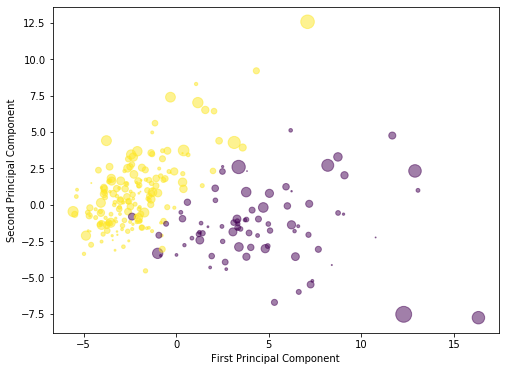

In [60]:
fig = plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],s = x_pca[:,2]*25, c=cancer['target'],alpha = 0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

ValueError: Argument Z must be 2-dimensional.

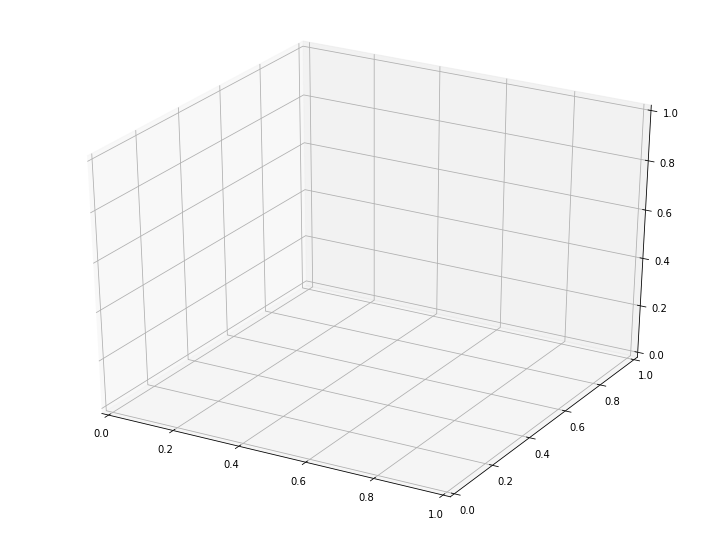

In [73]:
plt.figure(figsize = (12.8,9.6))
ax= plt.axes(projection = '3d')
ax.sca(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=cancer['target'], cmap = 'BrBG', s=50)

In [61]:
pca_instance.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016537, -0.0347675 ,  0.19034877,  0.36657548,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443046,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009202,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796412, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853119,  0.06454986, -0.00931418,  0.02869952, -0.10429146,
        -0.0740916 ,  0.00273362, -0.02556379, -0

In [62]:
df_comp = pd.DataFrame(pca_instance.components_,columns  = cancer['feature_names'])

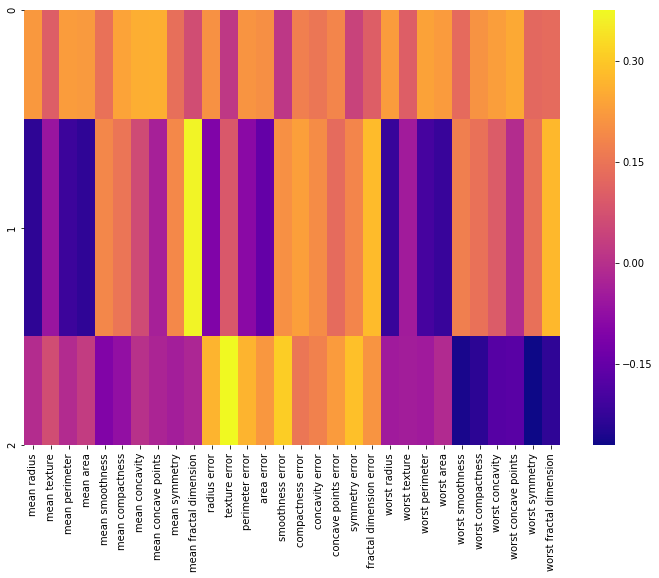

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp,cmap = 'plasma')
#This heatmap shows how correlated the original data features are to the two Principal Components we devised. 
#The higher the respective value, the more correlated the feature is to the component.

In [45]:
#The essence of the Principal components is to reduce the data we're passing into predictive models. Hence, the x_pca
#data can easily be passed to a regression model instead of the original scaled data